In [1]:
import unicodedata
import codecs
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

########################

import csv
import numpy as np
import string
import pandas as pd
import sys

import nltk
from textblob import TextBlob as tb
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.util import ngrams

import math
import re

############################

In [2]:
###################################################

def preprocess(text):
    #open the text file
    #converting the file from unicode to ascii
    with codecs.open(str(text),
                 "r",encoding='utf-8', errors='replace') as speech:
        raw=speech.read()
        raw_asc = unicodedata.normalize('NFKD', raw).encode('ascii','ignore')

    #removing puncutation 
    tokenizer = RegexpTokenizer(r'\w+')
    #tokens = sent_tokenize(raw_asc)
    tokens = tokenizer.tokenize(raw_asc)
    #print 'remove punctuation'

    #make everything lowercase
    tokens = [token.lower() for token in tokens]
    all_text = nltk.Text(tokens)
    #print 'All lowercase'

    #removing stopwords and audience responses
    stopset = (stopwords.words('english') + ["[applause]","[laughter]","[boos]"])
    clean = [word for word in all_text if word not in stopset]
    #print 'removed stopwords and audience response'

    return clean

#Converts text to ascii from unicode.
def load(text):
    #open the text file
    #converting the file from unicode to ascii
    with codecs.open(str(text),
                 "r",encoding='utf-8', errors='replace') as speech:
        raw=speech.read()
        raw_asc = unicodedata.normalize('NFKD', raw).encode('ascii','ignore')
    return raw_asc

#creates a list of the numberof times a word is used in each speech
def WordCount(word):
    word_count = []
    for i in range(len(speech_list)):
        num = speech_list[i].count(str(word))
        word_count.append(num)
    return word_count


In [3]:
#all speeches are in list. 
speech = []

for i in range(1789,2018):
    sp = 'StateU/state' + str(i) + '.txt'
    inaug = load(str(sp))
    speech.append(inaug)

print 'Loaded all speeches'

Loaded all speeches


Converted to TF-IDF Matrix.


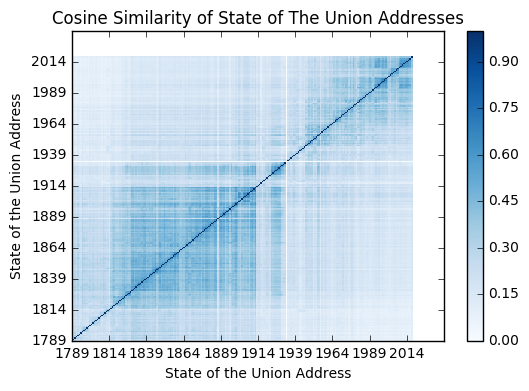

In [4]:
#converts all speeches into tfidf matrix
tfidf = TfidfVectorizer(speech, stop_words = 'english').fit_transform(speech)

print 'Converted to TF-IDF Matrix.'



#create a cosine similarity matrix for each text file
from sklearn.metrics.pairwise import cosine_similarity
cos = cosine_similarity(tfidf, tfidf)

#show a heat map of how similar speeches are to each other
plt.title('Cosine Similarity of State of The Union Addresses')
plt.xlabel('State of the Union Address')
plt.ylabel('State of the Union Address')
heatmap = plt.pcolor(cos, cmap=plt.cm.Blues)
plt.colorbar(heatmap)
plt.xticks(range(0,228,25),range(1789,2017,25))
plt.yticks(range(0,228,25),range(1789,2017,25))
plt.show()


In [5]:
#Creating a list of all the words in the addresses

speech_list = []

for i in range(1789,2018):
    speech = 'StateU/state' + str(i) + '.txt'
    inaug = preprocess(str(speech))
    speech_list.append(inaug)
    
print 'Addresses loaded'

Addresses loaded


([<matplotlib.axis.XTick at 0x11622aa90>,
 <a list of 10 Text xticklabel objects>)

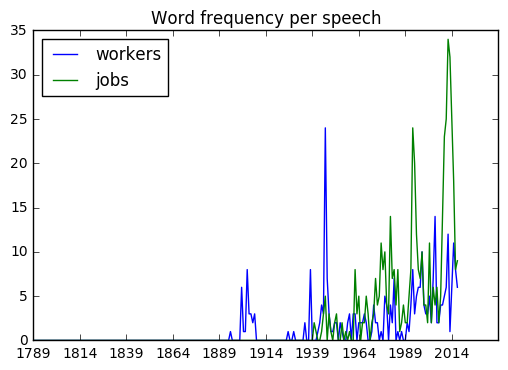

In [6]:
#frequency of words compared
sub = 'workers'
sub2 = 'jobs'
word = WordCount(str(sub))
word2 = WordCount(str(sub2))
plt.title('Word frequency per speech')
plt.plot(word, label = str(sub))
plt.plot(word2, label = str(sub2))
plt.legend(loc = 'upper left')
plt.xticks(range(0,228,25),range(1789,2017,25))
#plt.axvline(71, color = 'y')

([<matplotlib.axis.XTick at 0x11cf8e990>,
 <a list of 10 Text xticklabel objects>)

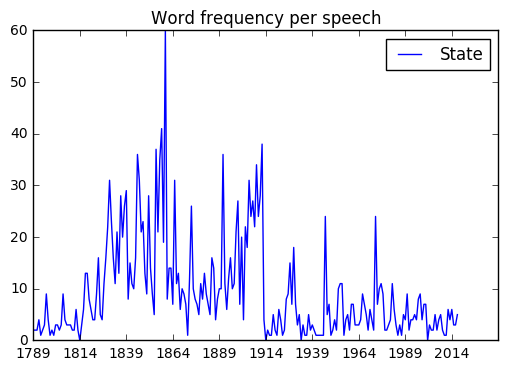

In [7]:
#frequency of state
state = WordCount('state')
plt.title('Word frequency per speech')
plt.plot(state, label = 'State')
plt.legend(loc = 'upper right')
plt.xticks(range(0,228,25),range(1789,2017,25))
#plt.axvline(71, color = 'y')

In [8]:
#Determing the common words and bigrams from speeches between 1814 and 1913

group2 = []
for i in range(25,125):
    for j in range(len(speech_list[i])):
        group2.append(speech_list[i][j])
        
bigrams = ngrams(group2,2)

    
print 'words'
fdist1 = FreqDist(group2)
print fdist1.most_common(10)

print 'bigram'
fdist2 = FreqDist(bigrams)
fdist2.most_common(10)

words
[('states', 5403), ('government', 5329), ('united', 3860), ('upon', 3577), ('congress', 3386), ('would', 2863), ('may', 2762), ('public', 2446), ('made', 2409), ('year', 2393)]
bigram


[(('united', 'states'), 3776),
 (('000', '000'), 729),
 (('fiscal', 'year'), 555),
 (('great', 'britain'), 470),
 (('per', 'cent'), 389),
 (('last', 'session'), 355),
 (('report', 'secretary'), 301),
 (('june', '30'), 274),
 (('attention', 'congress'), 272),
 (('year', 'ending'), 239)]

([<matplotlib.axis.XTick at 0x11d259250>,
 <a list of 10 Text xticklabel objects>)

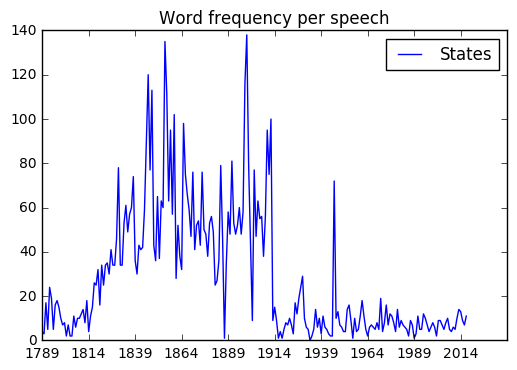

In [9]:
#frequeny of states per speech
states = WordCount('states')
plt.title('Word frequency per speech')
plt.plot(states, label = 'States')
plt.legend(loc = 'upper right')
plt.xticks(range(0,228,25),range(1789,2017,25))
#plt.axvline(71, color = 'y')

In [10]:
#The gap between the 100 common years and calvin coolidge

groupgap = []
for i in range(125,134):
    for j in range(len(speech_list[i])):
        groupgap.append(speech_list[i][j])


bigrams = ngrams(groupgap,2)    

print 'bag of words'
fdist1 = FreqDist(groupgap)
print fdist1.most_common(10)

print 'bigram'
fdist2 = FreqDist(bigrams)
fdist2.most_common(10)

bag of words
[('must', 134), ('war', 133), ('government', 133), ('upon', 132), ('would', 130), ('world', 115), ('congress', 108), ('great', 107), ('may', 102), ('us', 93)]
bigram


[(('000', '000'), 34),
 (('united', 'states'), 32),
 (('interstate', 'commerce'), 15),
 (('fiscal', 'year'), 13),
 (('merchant', 'marine'), 11),
 (('session', 'congress'), 10),
 (('commerce', 'commission'), 10),
 (('may', 'well'), 9),
 (('call', 'attention'), 9),
 (('house', 'representatives'), 9)]

In [11]:
#find bigrams with 'must' in them
gapbi = list(nltk.bigrams(groupgap))

target = 'must'
must = []

for i in range(len(gapbi)):
    if target in gapbi[i]:
        must.append(gapbi[i])


In [12]:

fdist1 = FreqDist(speech_list[128])
print fdist1.most_common(10)

fdist1 = FreqDist(speech_list[127])
print fdist1.most_common(10)

[('war', 31), ('must', 28), ('world', 20), ('people', 20), ('peace', 20), ('shall', 19), ('purpose', 14), ('us', 13), ('men', 11), ('german', 11)]
[('upon', 14), ('action', 12), ('necessary', 12), ('shall', 11), ('country', 11), ('public', 10), ('congress', 10), ('may', 9), ('commission', 9), ('present', 9)]


In [13]:
#find bigrams with 'must' in them
gapbi = list(nltk.bigrams(speech_list[127]))

target = 'necessary'
action = []

for i in range(len(gapbi)):
    if target in gapbi[i]:
        action.append(gapbi[i])
print action

print 'common words'
fdist1 = FreqDist(speech_list[127])
print fdist1.most_common(10)

bigrams = ngrams(gapbi,2)    

print 'bigram'
fdist2 = FreqDist(bigrams)
fdist2.most_common(10)

[('judged', 'necessary'), ('necessary', 'expedient'), ('seems', 'necessary'), ('necessary', 'feasible'), ('seems', 'necessary'), ('necessary', 'interest'), ('imperatively', 'necessary'), ('necessary', 'earliest'), ('rendered', 'necessary'), ('necessary', 'adoption'), ('deem', 'necessary'), ('necessary', 'renew'), ('railways', 'necessary'), ('necessary', 'time'), ('society', 'necessary'), ('necessary', 'processes'), ('opportune', 'necessary'), ('necessary', 'even'), ('less', 'necessary'), ('necessary', 'immediate'), ('experience', 'necessary'), ('necessary', 'instrumentalities'), ('houses', 'necessary'), ('necessary', 'speak')]
common words
[('upon', 14), ('action', 12), ('necessary', 12), ('shall', 11), ('country', 11), ('public', 10), ('congress', 10), ('may', 9), ('commission', 9), ('present', 9)]
bigram


[((('interstate', 'commerce'), ('commerce', 'commission')), 6),
 ((('eight', 'hour'), ('hour', 'day')), 4),
 ((('law', 'porto'), ('porto', 'rico')), 2),
 ((('organic', 'law'), ('law', 'porto')), 2),
 ((('adoption', 'eight'), ('eight', 'hour')), 2),
 ((('hour', 'day'), ('day', 'legal')), 2),
 ((('day', 'legal'), ('legal', 'basis')), 2),
 ((('full', 'public'), ('public', 'investigation')), 2),
 ((('expenditure', 'money'), ('money', 'elections')), 2),
 ((('adopt', 'new'), ('new', 'principle')), 1)]

In [14]:
#PostwwII 

groupwar2 = []
for i in range(156,228):
    for j in range(len(speech_list[i])):
        groupwar2.append(speech_list[i][j])


bigrams = ngrams(groupwar2,2)    

print 'words'
fdist1 = FreqDist(groupwar2)
print fdist1.most_common(10)

print 'bigram'
fdist2 = FreqDist(bigrams)
fdist2.most_common(10)

words
[('must', 1615), ('people', 1577), ('world', 1428), ('new', 1391), ('america', 1369), ('year', 1332), ('us', 1265), ('congress', 1121), ('government', 1071), ('years', 1063)]
bigram


[(('united', 'states'), 392),
 (('american', 'people'), 257),
 (('last', 'year'), 223),
 (('let', 'us'), 195),
 (('health', 'care'), 184),
 (('fiscal', 'year'), 178),
 (('social', 'security'), 174),
 (('federal', 'government'), 169),
 (('years', 'ago'), 164),
 (('million', 'dollars'), 128)]

([<matplotlib.axis.XTick at 0x11096f410>,
 <a list of 10 Text xticklabel objects>)

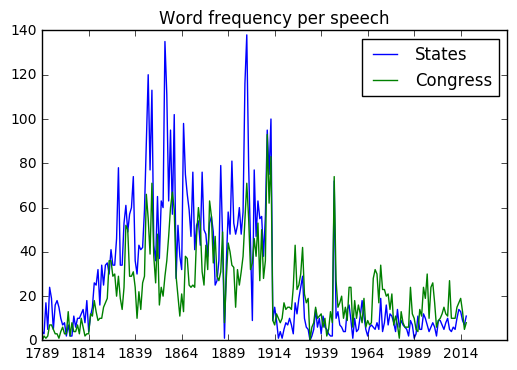

In [15]:
#graphing word counts per speech

states = WordCount('states')
cong = WordCount('congress')
plt.title('Word frequency per speech')
plt.plot(states, label = 'States')
plt.plot(cong, label = 'Congress')
plt.legend(loc = 'upper right')
plt.xticks(range(0,228,25),range(1789,2017,25))
#plt.axvline(71, color = 'y')

([<matplotlib.axis.XTick at 0x11dc7c090>,
 <a list of 10 Text xticklabel objects>)

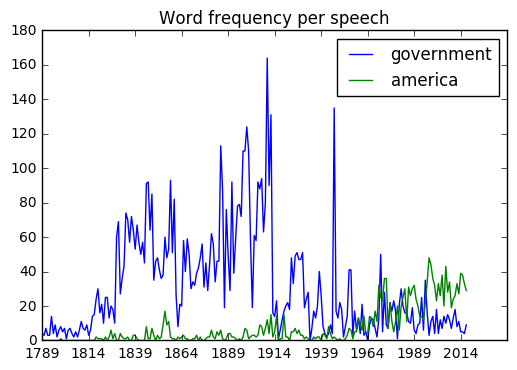

In [16]:
#graphing word counts per speech

ame = WordCount('america')
gov = WordCount('government')
plt.title('Word frequency per speech')
plt.plot(gov, label = 'government')
plt.plot(ame, label = 'america')

plt.legend(loc = 'upper right')
plt.xticks(range(0,228,25),range(1789,2017,25))
#plt.axvline(71, color = 'y')

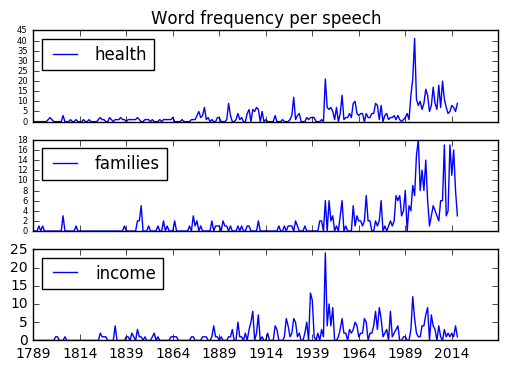

In [17]:
#graphing word counts per speech

health = WordCount('health')
fam = WordCount('families')
new = WordCount('income')

ax1 = plt.subplot(311)

plt.title('Word frequency per speech')
plt.plot(health, label = 'health')
plt.setp(ax1.get_yticklabels(), fontsize=6)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.legend(loc = 'upper left')
#date = [1789,2018]
#plt.xticks(date)

ax2 = plt.subplot(312, sharex=ax1)
plt.plot(fam, label = 'families')
plt.setp(ax2.get_yticklabels(), fontsize=6)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.legend(loc = 'upper left')

ax3 = plt.subplot(313,sharex = ax1)
plt.plot(new, label = 'income')
plt.xticks(range(0,228,25),range(1789,2017,25))
#plt.axvline(156, color = 'r')
plt.legend(loc = 'upper left')
plt.show()

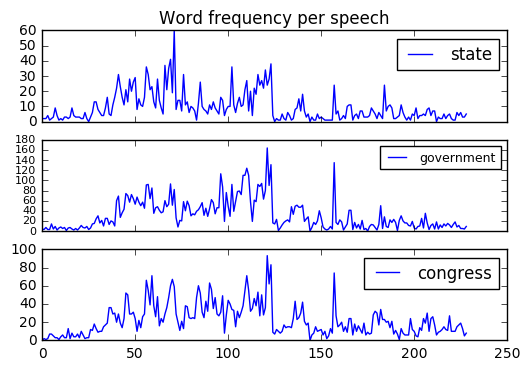

In [18]:
#graphing word counts per speech

gov = WordCount('government')
con = WordCount('congress')
sta = WordCount('state')

ax1 = plt.subplot(311)

plt.title('Word frequency per speech')
plt.plot(sta, label = 'state')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.legend(loc = 'upper right')
#date = [1789,2018]
#plt.xticks(date)

ax2 = plt.subplot(312,sharex=ax1)
plt.plot(gov, label = 'government')
plt.setp(ax2.get_yticklabels(), fontsize=8)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.legend(loc = 'upper right',prop={'size':9})

ax3 = plt.subplot(313,sharex=ax1)
plt.plot(con, label = 'congress')

plt.legend(loc = 'upper right')


In [19]:
#########POLITICAL PARTIES###########

In [20]:
#Carter 188-191
#Reagon 192-199
#HW BUSH 200-203
#clinton 204-211
#Bush 212-219
#Obama 220-227

rp = [192,193,194,195,196,197,198,199,200,201,202,203,212,213,214,215,216,217,218,219]
dp = [188,189,190,191,204,205,206,207,208,209,210,211,220,221,222,223,224,225,226,227]

In [21]:
#frequent words of the democrats in the last 40 years
dem = []
for i in dp:
    for j in range(len(speech_list[i])):
        dem.append(speech_list[i][j])

bigrams_d = ngrams(dem,2)    

print 'bag of words'
fdist1 = FreqDist(dem)
print fdist1.most_common(10)

print 'bigram'
fdist2 = FreqDist(bigrams_d)
print fdist2.most_common(10)

bag of words
[('people', 617), ('new', 532), ('america', 528), ('must', 461), ('us', 444), ('year', 412), ('work', 407), ('years', 405), ('american', 399), ('world', 377)]
bigram
[(('american', 'people'), 121), (('health', 'care'), 116), (('last', 'year'), 104), (('united', 'states'), 100), (('21st', 'century'), 70), (('make', 'sure'), 62), (('years', 'ago'), 59), (('social', 'security'), 56), (('2', 'years'), 50), (('new', 'jobs'), 49)]


In [22]:
#frequent words of the GOP in the last 40 years

gop = []
for i in rp:
    for j in range(len(speech_list[i])):
        gop.append(speech_list[i][j])

bigrams_r = ngrams(gop,2)    

print 'words'
fdist1 = FreqDist(gop)
print fdist1.most_common(15)

print 'bigram'
fdist2 = FreqDist(bigrams_r)
fdist2.most_common(10)

words
[('america', 514), ('must', 432), ('people', 366), ('us', 358), ('world', 302), ('new', 272), ('government', 264), ('american', 257), ('year', 232), ('years', 215), ('one', 212), ('congress', 211), ('freedom', 207), ('nation', 196), ('help', 196)]
bigram


[(('united', 'states'), 72),
 (('let', 'us'), 66),
 (('american', 'people'), 63),
 (('social', 'security'), 60),
 (('men', 'women'), 56),
 (('health', 'care'), 48),
 (('federal', 'government'), 42),
 (('al', 'qaida'), 38),
 (('members', 'congress'), 37),
 (('years', 'ago'), 37)]

In [23]:
print len(dem)
print len(gop)

67576
50437


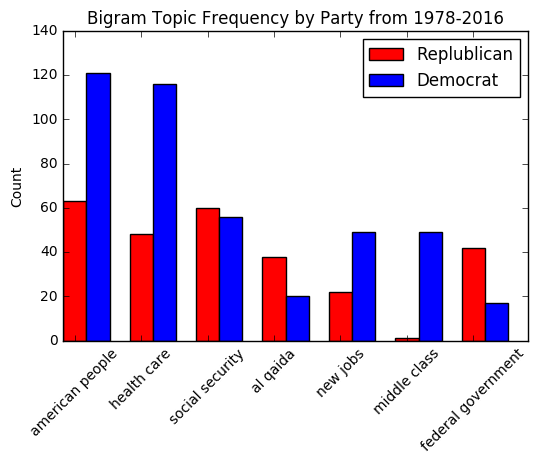

In [24]:
#graphing the count of common bigram topics discussed by party


N = 7
d_count = (121, 116, 56, 20, 49,49,17)
r_count = (63, 48, 60, 38, 22, 1,42)

ind = np.arange(N) 
width = 0.35       

fig, ax = plt.subplots()
r = ax.bar(ind, r_count, width, color='r')

d = ax.bar(ind + width, d_count, width, color='b')


ax.set_ylabel('Count')
ax.set_title('Bigram Topic Frequency by Party from 1978-2016')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('american people', 'health care', 'social security', 'al qaida',
                    'new jobs', 'middle class', 'federal government',),rotation = 45)

ax.legend((r[0], d[0]), ('Replublican', 'Democrat'))

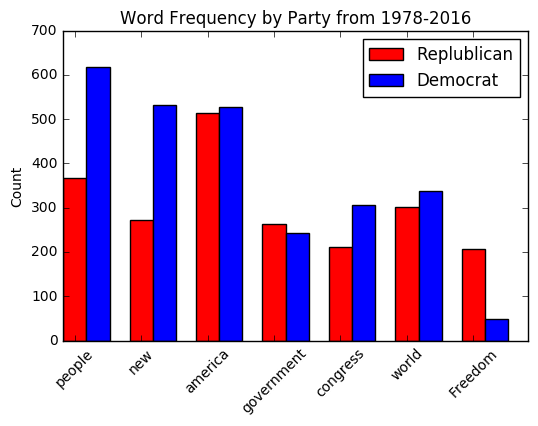

In [25]:
#graphing the count of common word topics discussed by party

N = 7
d_count = (617, 532, 528, 243, 306 ,337, 48)
r_count = (366, 272, 514, 264, 211, 302, 207)

ind = np.arange(N) 
width = 0.35      

fig, ax = plt.subplots()
r = ax.bar(ind, r_count, width, color='r')

d = ax.bar(ind + width, d_count, width, color='b')

ax.set_ylabel('Count')
ax.set_title('Word Frequency by Party from 1978-2016')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('people', 'new', 'america', 'government', 'congress', 'world', 'Freedom'),rotation = 45)

ax.legend((r[0], d[0]), ('Replublican', 'Democrat'))

In [26]:
#find bigrams with 'must' in them
counts = list(nltk.bigrams(gop))


target = 'class'
action = []

for i in range(len(counts)):
    if target in counts[i]:
        action.append(counts[i])
print action

[('entire', 'class'), ('class', 'land'), ('top', 'class'), ('class', 'may'), ('first', 'class'), ('class', 'james'), ('unhampered', 'class'), ('class', 'race'), ('middle', 'class'), ('class', 'gets'), ('irresponsible', 'class'), ('class', 'actions')]


In [27]:
#find count of bigram
counts = list(nltk.bigrams(gop))


target = 'middle'
target2 = 'class'
action = []

for i in range(len(counts)):
    if target in counts[i]:
        action.append(counts[i])

num = 0
for j in range(len(action)):
    if target2 in action[j]:
        num += 1
print num


1


In [28]:
#list modern era speeches
modern = []
for i in range(188,228):
    for j in range(len(speech_list[i])):
        modern.append(speech_list[i][j])
        


#count of words that start with 'terror'
num = 0
for i in range(len(modern)):
    if 'terror' in modern[i]:
        num += 1
print num


250


In [29]:
#list of speeches 212-220 - the bush presidency
bush = []
for i in range(212,220):
    for j in range(len(speech_list[i])):
        bush.append(speech_list[i][j])


In [30]:


#count of words that start with 'terror'
num = 0
for i in range(len(bush)):
    if 'terror' in bush[i]:
        num += 1
print num

171
